100%|██████████| 11/11 [01:54<00:00, 10.45s/it]


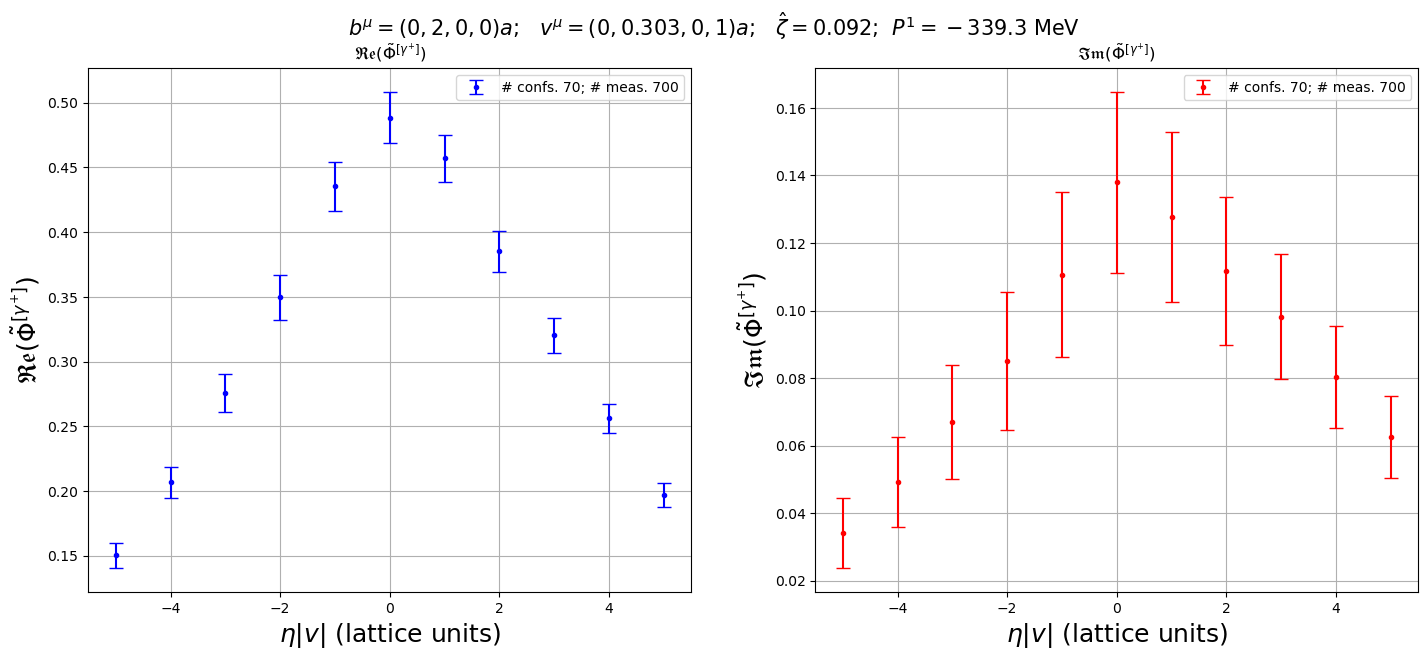

100%|██████████| 11/11 [01:53<00:00, 10.28s/it]


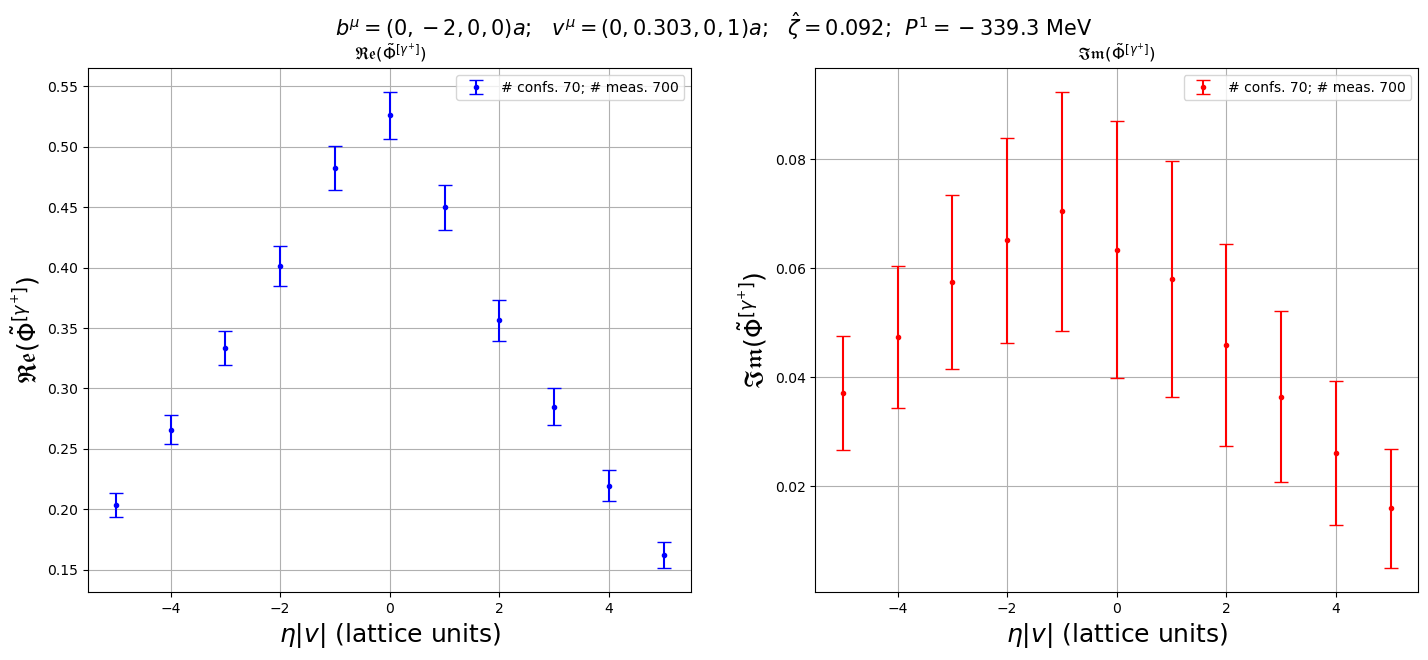

100%|██████████| 11/11 [03:45<00:00, 20.49s/it]


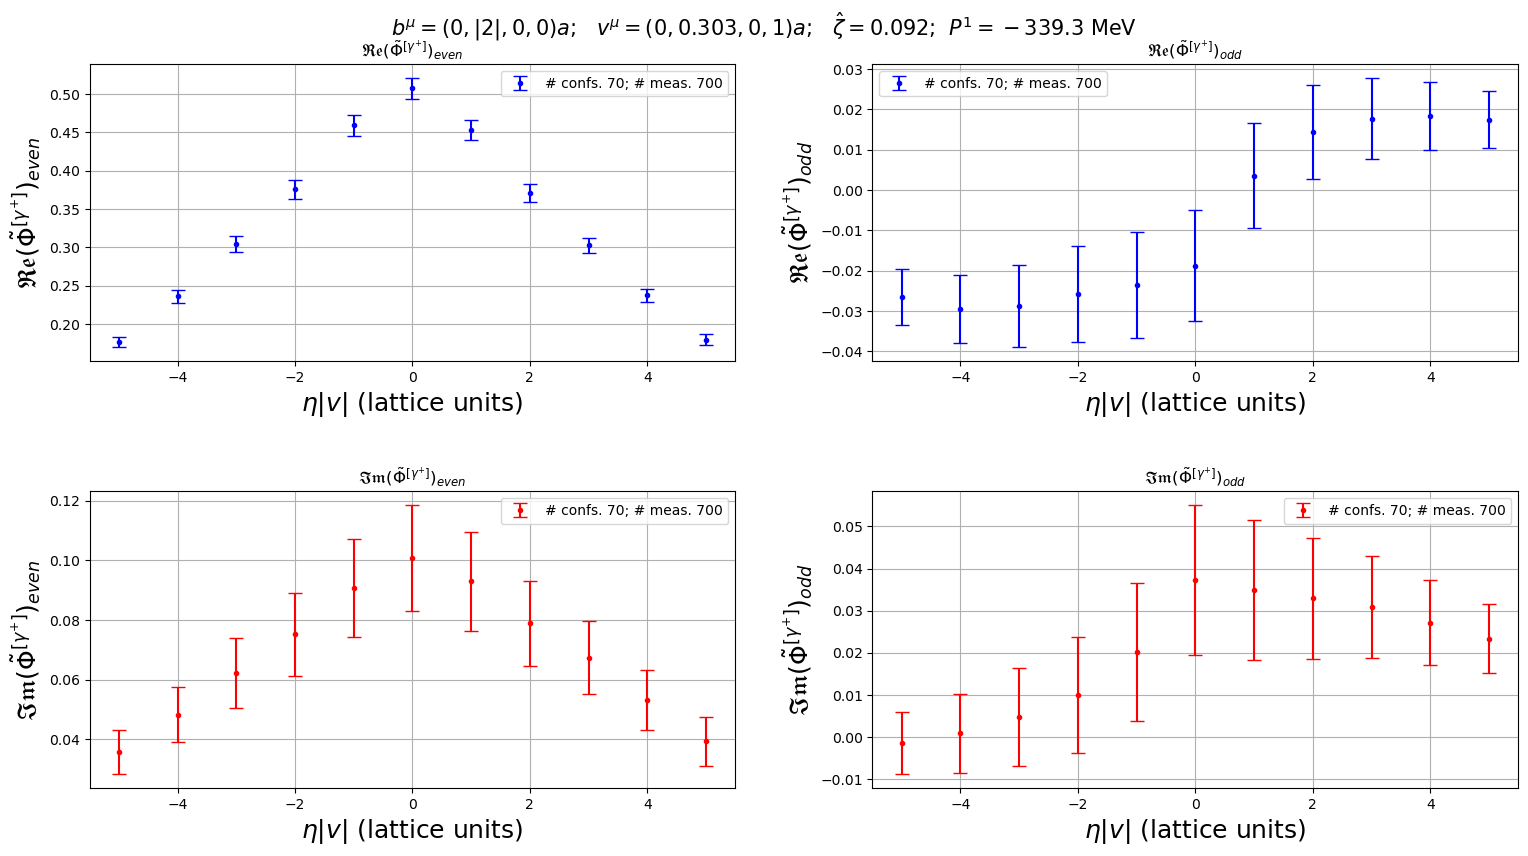

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from contextlib import ExitStack
from tqdm import tqdm
#lattice size a
a = 0.114

# plateau_fit
def plateau_fit(x, plateau_value):
    return np.full_like(x, plateau_value)



sources = [[0, 0, 0, 0], [8, 0, 0, 0], [16, 0, 0, 0], [24, 0, 0, 0], [0, 8, 0, 0], [0, 16, 0, 0], [0, 24, 0, 0], [0, 0, 8, 0], [0, 0, 16, 0], [0, 0, 24, 0]]

q = [0,0,0,0]
tsnk = 10
t = 10
psnk = [-1,0,0,0]




def extract_2pt_cfg_list(bl):
    with ExitStack() as stack:
        no_cfgs = 0
        list_cfg_G2_t_psnk = []
        for stream in range(0,1):
            for cfgs in range(1776, 2052+1, 4): #2052 
                if stream == 0:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_0_0__v_03_0_1_cfg_a_corrected_{cfgs-440}_.h5"
                    cfg = cfgs- 440
                elif stream == 1:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_b330_v_m03_0_1_cfg_b_corrected_{cfgs}_.h5"
                    cfg = cfgs
                h5_file = stack.enter_context(h5py.File(file_path, "r"))
                no_cfgs = no_cfgs + 1
                per_src_G2_t_psnk = []
                for csrc in sources:
                    path_to_G2_t_psnk_c_vector = f"/cfg_{cfg}/TwoPT_proton3/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}"
                    c_array_G2_t_psnk = h5_file[path_to_G2_t_psnk_c_vector]
                    real_array_G2_t_psnk = (c_array_G2_t_psnk[()]).real
                    per_src_G2_t_psnk.append(real_array_G2_t_psnk[tsnk])
                list_cfg_G2_t_psnk.append(np.mean(per_src_G2_t_psnk))
    return list_cfg_G2_t_psnk

def extract_3pts_cfg_list_sivers(tau, eta, bl):
    with ExitStack() as stack:
        list_cfg_G3_U_g1_real = []
        list_cfg_G3_D_g1_real = []
        list_cfg_G3_U_g1_imag = []
        list_cfg_G3_D_g1_imag = []
        list_cfg_G3_U_g8_real = []
        list_cfg_G3_D_g8_real = []
        list_cfg_G3_U_g8_imag = []
        list_cfg_G3_D_g8_imag = []
        list_cfg_G3_U_g2_real = []
        list_cfg_G3_D_g2_real = []
        list_cfg_G3_U_g2_imag = []
        list_cfg_G3_D_g2_imag = []
        no_cfgs = 0
        for stream in range(0,1):
            for cfgs in range(1776, 2052+1, 4): #2080
                if stream == 0:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_0_0__v_03_0_1_cfg_a_corrected_{cfgs-440}_.h5"
                    cfg = cfgs- 440
                elif stream == 1:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_b330_v_m03_0_1_cfg_b_corrected_{cfgs}_.h5"
                    cfg = cfgs
                h5_file = stack.enter_context(h5py.File(file_path, "r"))
                no_cfgs = no_cfgs + 1
                
                per_src_G3_U_g1_real = []
                per_src_G3_D_g1_real = []
                per_src_G3_U_g1_imag = []
                per_src_G3_D_g1_imag = []
                    
                per_src_G3_U_g8_real = []
                per_src_G3_D_g8_real = []
                per_src_G3_U_g8_imag = []
                per_src_G3_D_g8_imag = []
                for csrc in sources:
                    
                    ## gamma 1 (n=4)
                    # 3pt U quark
                    path_to_G3_U_vector_g1 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_U_g1 = h5_file[path_to_G3_U_vector_g1]
                    array_G3_U_g1_real = (c_array_G3_U_g1[()]).real
                    array_G3_U_g1_imag = (c_array_G3_U_g1[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g1 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_D_g1 = h5_file[path_to_G3_D_vector_g1]
                    array_G3_D_g1_real = (c_array_G3_D_g1[()]).real
                    array_G3_D_g1_imag = (c_array_G3_D_g1[()]).imag
                    
                    ## gamma 4 (n=8)
                    # 3pt U quark
                    path_to_G3_U_vector_g8 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_U_g8 = h5_file[path_to_G3_U_vector_g8]
                    array_G3_U_g8_real = (c_array_G3_U_g8[()]).real
                    array_G3_U_g8_imag = (c_array_G3_U_g8[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g8 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_D_g8 = h5_file[path_to_G3_D_vector_g8]
                    array_G3_D_g8_real = (c_array_G3_D_g8[()]).real
                    array_G3_D_g8_imag = (c_array_G3_D_g8[()]).imag
                    

                    per_src_G3_U_g1_real.append(array_G3_U_g1_real[tau])
                    per_src_G3_D_g1_real.append(array_G3_D_g1_real[tau])
                    per_src_G3_U_g1_imag.append(array_G3_U_g1_imag[tau])
                    per_src_G3_D_g1_imag.append(array_G3_D_g1_imag[tau])
                    
                    per_src_G3_U_g8_real.append(array_G3_U_g8_real[tau])
                    per_src_G3_D_g8_real.append(array_G3_D_g8_real[tau])
                    per_src_G3_U_g8_imag.append(array_G3_U_g8_imag[tau])
                    per_src_G3_D_g8_imag.append(array_G3_D_g8_imag[tau])
                
                
                list_cfg_G3_U_g1_real.append(np.mean(per_src_G3_U_g1_real))
                list_cfg_G3_D_g1_real.append(np.mean(per_src_G3_D_g1_real))
                list_cfg_G3_U_g1_imag.append(np.mean(per_src_G3_U_g1_imag))
                list_cfg_G3_D_g1_imag.append(np.mean(per_src_G3_D_g1_imag))
                    
                list_cfg_G3_U_g8_real.append(np.mean(per_src_G3_U_g8_real))
                list_cfg_G3_D_g8_real.append(np.mean(per_src_G3_D_g8_real))
                list_cfg_G3_U_g8_imag.append(np.mean(per_src_G3_U_g8_imag))
                list_cfg_G3_D_g8_imag.append(np.mean(per_src_G3_D_g8_imag))
                   
             
    return list_cfg_G3_U_g1_real, list_cfg_G3_D_g1_real, list_cfg_G3_U_g1_imag, list_cfg_G3_D_g1_imag, list_cfg_G3_U_g8_real, list_cfg_G3_D_g8_real, list_cfg_G3_U_g8_imag, list_cfg_G3_D_g8_imag, no_cfgs



def jackknife_ratio_for_tau_3pt_2pt(tau, eta, bl):
    #2pt
    list_cfg_G2_t_psnk = extract_2pt_cfg_list(bl)
    
    #3pt
    list_cfg_G3_U_g1_real, list_cfg_G3_D_g1_real, list_cfg_G3_U_g1_imag, list_cfg_G3_D_g1_imag, list_cfg_G3_U_g8_real, list_cfg_G3_D_g8_real, list_cfg_G3_U_g8_imag, list_cfg_G3_D_g8_imag, no_cfgs = extract_3pts_cfg_list_sivers(tau, eta, bl)
    
    G3_U_gp_real = (-np.mean(list_cfg_G3_U_g1_imag)+np.mean(list_cfg_G3_U_g8_real))/(np.sqrt(2))
    G3_D_gp_real = (-np.mean(list_cfg_G3_D_g1_imag)+np.mean(list_cfg_G3_D_g8_real))/(np.sqrt(2))
    
    G3_U_gp_imag = (np.mean(list_cfg_G3_U_g1_real)+np.mean(list_cfg_G3_U_g8_imag))/(np.sqrt(2))
    G3_D_gp_imag = (np.mean(list_cfg_G3_D_g1_real)+np.mean(list_cfg_G3_D_g8_imag))/(np.sqrt(2))
    
    
    #G3_U_gp_real = (np.mean(list_cfg_G3_U_g8_real))
    #G3_D_gp_real = (np.mean(list_cfg_G3_D_g8_real))
    
    #G3_U_gp_imag = (np.mean(list_cfg_G3_U_g8_imag))
    #G3_D_gp_imag = (np.mean(list_cfg_G3_D_g8_imag))
    
    
    #ratio 3pt to 2pt
    G3_U_D_gp_real = ((G3_U_gp_real)-(G3_D_gp_real))/np.mean(list_cfg_G2_t_psnk)
    G3_U_D_gp_imag = ((G3_U_gp_imag)-(G3_D_gp_imag))/np.mean(list_cfg_G2_t_psnk)
    
    # making jackknife set
    sigma_square_Ratio_gp_real = 0
    sigma_square_Ratio_gp_imag = 0
    for i in range(len(list_cfg_G2_t_psnk)): #Jackknife
        #ratio 3pt to 2pt
        jkknife_G3_U_gp_real = (-np.mean( list_cfg_G3_U_g1_imag[:i] + list_cfg_G3_U_g1_imag[(i+1):] )+np.mean( list_cfg_G3_U_g8_real[:i] + list_cfg_G3_U_g8_real[(i+1):] ))/(np.sqrt(2))
        jkknife_G3_D_gp_real = (-np.mean( list_cfg_G3_D_g1_imag[:i] + list_cfg_G3_D_g1_imag[(i+1):] )+np.mean( list_cfg_G3_D_g8_real[:i] + list_cfg_G3_D_g8_real[(i+1):] ))/(np.sqrt(2))
    
        jkknife_G3_U_gp_imag = (np.mean( list_cfg_G3_U_g1_real[:i] + list_cfg_G3_U_g1_real[(i+1):] )+np.mean( list_cfg_G3_U_g8_imag[:i] + list_cfg_G3_U_g8_imag[(i+1):] ))/(np.sqrt(2))
        jkknife_G3_D_gp_imag = (np.mean( list_cfg_G3_D_g1_real[:i] + list_cfg_G3_D_g1_real[(i+1):] )+np.mean( list_cfg_G3_D_g8_imag[:i] + list_cfg_G3_D_g8_imag[(i+1):] ))/(np.sqrt(2))
        
        #jkknife_G3_U_gp_real = (np.mean( list_cfg_G3_U_g8_real[:i] + list_cfg_G3_U_g8_real[(i+1):] ))
        #jkknife_G3_D_gp_real = (np.mean( list_cfg_G3_D_g8_real[:i] + list_cfg_G3_D_g8_real[(i+1):] ))
    
        #jkknife_G3_U_gp_imag = (np.mean( list_cfg_G3_U_g8_imag[:i] + list_cfg_G3_U_g8_imag[(i+1):] ))
        #jkknife_G3_D_gp_imag = (np.mean( list_cfg_G3_D_g8_imag[:i] + list_cfg_G3_D_g8_imag[(i+1):] ))
        
        
        jkknife_G3_U_D_gp_real = ((jkknife_G3_U_gp_real)-(jkknife_G3_D_gp_real))/(np.mean( list_cfg_G2_t_psnk[:(i)] + list_cfg_G2_t_psnk[(i+1):] ))
        jkknife_G3_U_D_gp_imag = ((jkknife_G3_U_gp_imag)-(jkknife_G3_D_gp_imag))/(np.mean( list_cfg_G2_t_psnk[:(i)] + list_cfg_G2_t_psnk[(i+1):] ))
    
        sigma_square_Ratio_gp_real = sigma_square_Ratio_gp_real + np.square(G3_U_D_gp_real-jkknife_G3_U_D_gp_real)
        sigma_square_Ratio_gp_imag = sigma_square_Ratio_gp_imag + np.square(G3_U_D_gp_imag-jkknife_G3_U_D_gp_imag)
    error_G3_U_D_gp_real = np.sqrt(((no_cfgs-1)/(no_cfgs))*sigma_square_Ratio_gp_real)
    error_G3_U_D_gp_imag = np.sqrt(((no_cfgs-1)/(no_cfgs))*sigma_square_Ratio_gp_imag)
    return G3_U_D_gp_real, error_G3_U_D_gp_real, G3_U_D_gp_imag, error_G3_U_D_gp_imag, no_cfgs


def ratio_3pt_2pt_plateau(plateau_t_i_re, plateau_t_f_re, plateau_t_i_im, plateau_t_f_im, eta, bl):
    G3_U_D_gp_real_list = []
    error_G3_U_D_gp_real_list = []
    G3_U_D_gp_imag_list = []
    error_G3_U_D_gp_imag_list = []
    for tau in (range(0, tsnk+1)):
        G3_U_D_gp_real, error_G3_U_D_gp_real, G3_U_D_gp_imag, error_G3_U_D_gp_imag, no_cfgs = jackknife_ratio_for_tau_3pt_2pt(tau, eta, bl)
        G3_U_D_gp_real_list.append(G3_U_D_gp_real)
        error_G3_U_D_gp_real_list.append(error_G3_U_D_gp_real)
        G3_U_D_gp_imag_list.append(G3_U_D_gp_imag)
        error_G3_U_D_gp_imag_list.append(error_G3_U_D_gp_imag)
      
    ####################### Curve fitting #######################
    time_for_plateau_re = list(range(plateau_t_i_re, plateau_t_f_re + 1))
    time_for_plateau_im = list(range(plateau_t_i_im, plateau_t_f_im + 1))
    G3_U_D_gp_real_list_plateau = []
    error_G3_U_D_gp_real_list_plateau = []
    G3_U_D_gp_imag_list_plateau = []
    error_G3_U_D_gp_imag_list_plateau = []
    for t_plateau in range(len(time_for_plateau_re)):
        G3_U_D_gp_real_list_plateau.append(G3_U_D_gp_real_list[t_plateau+plateau_t_i_re])
        error_G3_U_D_gp_real_list_plateau.append(error_G3_U_D_gp_real_list[t_plateau+plateau_t_i_re])
    for t_plateau in range(len(time_for_plateau_im)):   
        G3_U_D_gp_imag_list_plateau.append(G3_U_D_gp_imag_list[t_plateau+plateau_t_i_im])
        error_G3_U_D_gp_imag_list_plateau.append(error_G3_U_D_gp_imag_list[t_plateau+plateau_t_i_im])
        
    params_gp_real, cov_gp_real = curve_fit(plateau_fit, time_for_plateau_re, G3_U_D_gp_real_list_plateau, sigma = error_G3_U_D_gp_real_list_plateau, absolute_sigma=True)
    G3_U_D_gp_real_plateau = params_gp_real
    error_G3_U_D_gp_real_plateau = np.sqrt(np.diag(cov_gp_real))
    
    params_gp_imag, cov_gp_imag = curve_fit(plateau_fit, time_for_plateau_im, G3_U_D_gp_imag_list_plateau, sigma = error_G3_U_D_gp_imag_list_plateau, absolute_sigma=True)
    G3_U_D_gp_imag_plateau = params_gp_imag
    error_G3_U_D_gp_imag_plateau = np.sqrt(np.diag(cov_gp_imag))
    
    
    #siverse_ratio =  -G3_U_D_gp_imag_plateau[0]/(b*G3_U_D_gp_real_plateau[0])
    #error_siverse_ratio = siverse_ratio * np.sqrt(np.square((error_G3_U_D_gp_imag_plateau[0])/(G3_U_D_gp_imag_plateau[0])+np.square((error_G3_U_D_gp_real_plateau[0])/(G3_U_D_gp_real_plateau[0]))))
    
    phi_gp_real = G3_U_D_gp_real_plateau[0]
    error_phi_gp_real = error_G3_U_D_gp_real_plateau[0]
    
    phi_gp_imag = G3_U_D_gp_imag_plateau[0]
    error_phi_gp_imag = error_G3_U_D_gp_imag_plateau[0]

    return phi_gp_real, abs(error_phi_gp_real), phi_gp_imag, abs(error_phi_gp_imag), no_cfgs


def plot_gamma_plus_3pt_Re_Im(bl):
    phi_gp_real_list_eta = []
    error_phi_gp_real_list_eta = []
    phi_gp_imag_list_eta = []
    error_phi_gp_imag_list_eta = []
    for eta in tqdm(range(-5, 1+5, 1)):
        phi_gp_real, error_phi_gp_real, phi_gp_imag, error_phi_gp_imag, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, bl) 
        phi_gp_real_list_eta.append(phi_gp_real)
        error_phi_gp_real_list_eta.append(error_phi_gp_real)
        phi_gp_imag_list_eta.append(phi_gp_imag)
        error_phi_gp_imag_list_eta.append(error_phi_gp_imag)
    time_for_plot = list(range(-5, 1 + 5))
    fig, axs = plt.subplots(1, 2, figsize=(15, 7)) 
    axs[0].errorbar(time_for_plot, phi_gp_real_list_eta, yerr=error_phi_gp_real_list_eta, fmt='o', markersize=3, capsize=5, color='blue', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[0].set_ylabel("$\mathfrak{Re}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)$", fontsize=18)
    axs[0].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[0].set_title("$\mathfrak{Re}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)$", fontsize=12)
    axs[0].legend(fontsize=10)
    axs[0].grid(True)
    
    axs[1].errorbar(time_for_plot, phi_gp_imag_list_eta, yerr=error_phi_gp_imag_list_eta, fmt='o', markersize=3, capsize=5, color='Red', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[1].set_ylabel("$\mathfrak{Im}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)$", fontsize=18)
    axs[1].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[1].set_title("$\mathfrak{Im}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)$", fontsize=12)
    axs[1].legend(fontsize=10)
    axs[1].grid(True)
    
    plt.tight_layout(pad=3.3)
    fig.suptitle("$b^{\\mu}=(0,%d,0,0)a$;   $v^{\\mu}=(0,0.303,0,1)a$;   $\\hat{\\zeta}=0.092$;  $P^{1}=-339.3\\text{ MeV}$" %(bl), fontsize=15) 
    plt.savefig("gplus_imag_real_b%d00_.pdf"%(bl), dpi=50000)
    plt.show()
    return

def plot_gamma_plus_3pt_Re_Im_even_odd(bl):
    phi_gp_real_list_eta_even = []
    error_phi_gp_real_list_eta_even = []
    phi_gp_real_list_eta_odd = []
    error_phi_gp_real_list_eta_odd = []
    phi_gp_imag_list_eta_even = []
    error_phi_gp_imag_list_eta_even = []
    phi_gp_imag_list_eta_odd = []
    error_phi_gp_imag_list_eta_odd = []
    for eta in tqdm(range(-5, 1+5, 1)):
        phi_gp_real_plus_bl, error_phi_gp_real_plus_bl, phi_gp_imag_plus_bl, error_phi_gp_imag_plus_bl, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, bl)
        phi_gp_real_minus_bl, error_phi_gp_real_minus_bl, phi_gp_imag_minus_bl, error_phi_gp_imag_minus_bl, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, -bl)
        
        phi_gp_real_list_eta_even.append((phi_gp_real_plus_bl+phi_gp_real_minus_bl)/2)
        phi_gp_real_list_eta_odd.append((phi_gp_real_plus_bl-phi_gp_real_minus_bl)/2)
        
        error_phi_gp_real_list_eta_even.append((np.sqrt(np.square(error_phi_gp_real_plus_bl)+np.square(error_phi_gp_real_minus_bl)))/2)
        error_phi_gp_real_list_eta_odd.append((np.sqrt(np.square(error_phi_gp_real_plus_bl)+np.square(error_phi_gp_real_minus_bl)))/2)
        
        phi_gp_imag_list_eta_even.append((phi_gp_imag_plus_bl+phi_gp_imag_minus_bl)/2)
        phi_gp_imag_list_eta_odd.append((phi_gp_imag_plus_bl-phi_gp_imag_minus_bl)/2)
        
        error_phi_gp_imag_list_eta_even.append((np.sqrt(np.square(error_phi_gp_imag_plus_bl)+np.square(error_phi_gp_imag_minus_bl)))/2)
        error_phi_gp_imag_list_eta_odd.append((np.sqrt(np.square(error_phi_gp_imag_plus_bl)+np.square(error_phi_gp_imag_minus_bl)))/2)
        
    time_for_plot = list(range(-5, 1 + 5))
    fig, axs = plt.subplots(2, 2, figsize=(16, 9)) 
    axs[0, 0].errorbar(time_for_plot, phi_gp_real_list_eta_even, yerr=error_phi_gp_real_list_eta_even, fmt='o', markersize=3, capsize=5, color='blue', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[0, 0].set_ylabel("$\mathfrak{Re}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)_{even}$", fontsize=18)
    axs[0, 0].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[0, 0].set_title("$\mathfrak{Re}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)_{even}$", fontsize=12)
    axs[0, 0].legend(fontsize=10)
    axs[0, 0].grid(True)
    
    axs[0, 1].errorbar(time_for_plot, phi_gp_real_list_eta_odd, yerr=error_phi_gp_real_list_eta_odd, fmt='o', markersize=3, capsize=5, color='blue', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[0, 1].set_ylabel("$\mathfrak{Re}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)_{odd}$", fontsize=18)
    axs[0, 1].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[0, 1].set_title("$\mathfrak{Re}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)_{odd}$", fontsize=12)
    axs[0, 1].legend(fontsize=10)
    axs[0, 1].grid(True)
    
    axs[1, 0].errorbar(time_for_plot, phi_gp_imag_list_eta_even, yerr=error_phi_gp_imag_list_eta_even, fmt='o', markersize=3, capsize=5, color='red', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[1, 0].set_ylabel("$\mathfrak{Im}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)_{even}$", fontsize=18)
    axs[1, 0].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[1, 0].set_title("$\mathfrak{Im}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)_{even}$", fontsize=12)
    axs[1, 0].legend(fontsize=10)
    axs[1, 0].grid(True)
    
    axs[1, 1].errorbar(time_for_plot, phi_gp_imag_list_eta_odd, yerr=error_phi_gp_imag_list_eta_odd, fmt='o', markersize=3, capsize=5, color='red', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[1, 1].set_ylabel("$\mathfrak{Im}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)_{odd}$", fontsize=18)
    axs[1, 1].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[1, 1].set_title("$\mathfrak{Im}\\left(\\tilde{\Phi}^{[\gamma^{+}]}\\right)_{odd}$", fontsize=12)
    axs[1, 1].legend(fontsize=10)
    axs[1, 1].grid(True)
    
    plt.tight_layout(pad=3.3)
    fig.suptitle("$b^{\\mu}=(0,|%d|,0,0)a$;   $v^{\\mu}=(0,0.303,0,1)a$;   $\\hat{\\zeta}=0.092$;  $P^{1}=-339.3\\text{ MeV}$" %(bl), fontsize=15) 
    plt.savefig("gplus_imag_real_b%d00_even_odd.pdf"%(bl), dpi=50000)
    plt.show()
    return






plot_gamma_plus_3pt_Re_Im(bl=2)
plot_gamma_plus_3pt_Re_Im(bl=-2)
plot_gamma_plus_3pt_Re_Im_even_odd(bl=2)
